In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import random
import scipy.stats as st
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science with Python/Project/Bank Loan Defaulter/bank_loan_defaulter.csv')

In [4]:
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [6]:
df['Home Ownership'].unique()

array([176346.6267 ,  39833.921  ,  91506.69105, ...,  34813.96985,
        96938.83564, 105123.1558 ])

In [7]:
df.nunique()

ID                              67463
Loan Amount                     27525
Funded Amount                   24548
Funded Amount Investor          67441
Term                                3
Batch Enrolled                     41
Interest Rate                   67448
Grade                               7
Sub Grade                          35
Employment Duration                 3
Home Ownership                  67454
Verification Status                 3
Payment Plan                        1
Loan Title                        109
Debit to Income                 67454
Delinquency - two years             9
Inquires - six months               6
Open Account                       36
Public Record                       5
Revolving Balance               20582
Revolving Utilities             67458
Total Accounts                     69
Initial List Status                 2
Total Received Interest         67451
Total Received Late Fee         67380
Recoveries                      67387
Collection R

In [8]:
df.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


In [9]:
df.isnull().sum()
# Dataset has no missing values

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'Loan Amount'}>,
        <Axes: title={'center': 'Funded Amount'}>,
        <Axes: title={'center': 'Funded Amount Investor'}>,
        <Axes: title={'center': 'Term'}>],
       [<Axes: title={'center': 'Interest Rate'}>,
        <Axes: title={'center': 'Home Ownership'}>,
        <Axes: title={'center': 'Debit to Income'}>,
        <Axes: title={'center': 'Delinquency - two years'}>,
        <Axes: title={'center': 'Inquires - six months'}>],
       [<Axes: title={'center': 'Open Account'}>,
        <Axes: title={'center': 'Public Record'}>,
        <Axes: title={'center': 'Revolving Balance'}>,
        <Axes: title={'center': 'Revolving Utilities'}>,
        <Axes: title={'center': 'Total Accounts'}>],
       [<Axes: title={'center': 'Total Received Interest'}>,
        <Axes: title={'center': 'Total Received Late Fee'}>,
        <Axes: title={'center': 'Recoveries'}>,
        <Axes: title={'center': 'Collection 

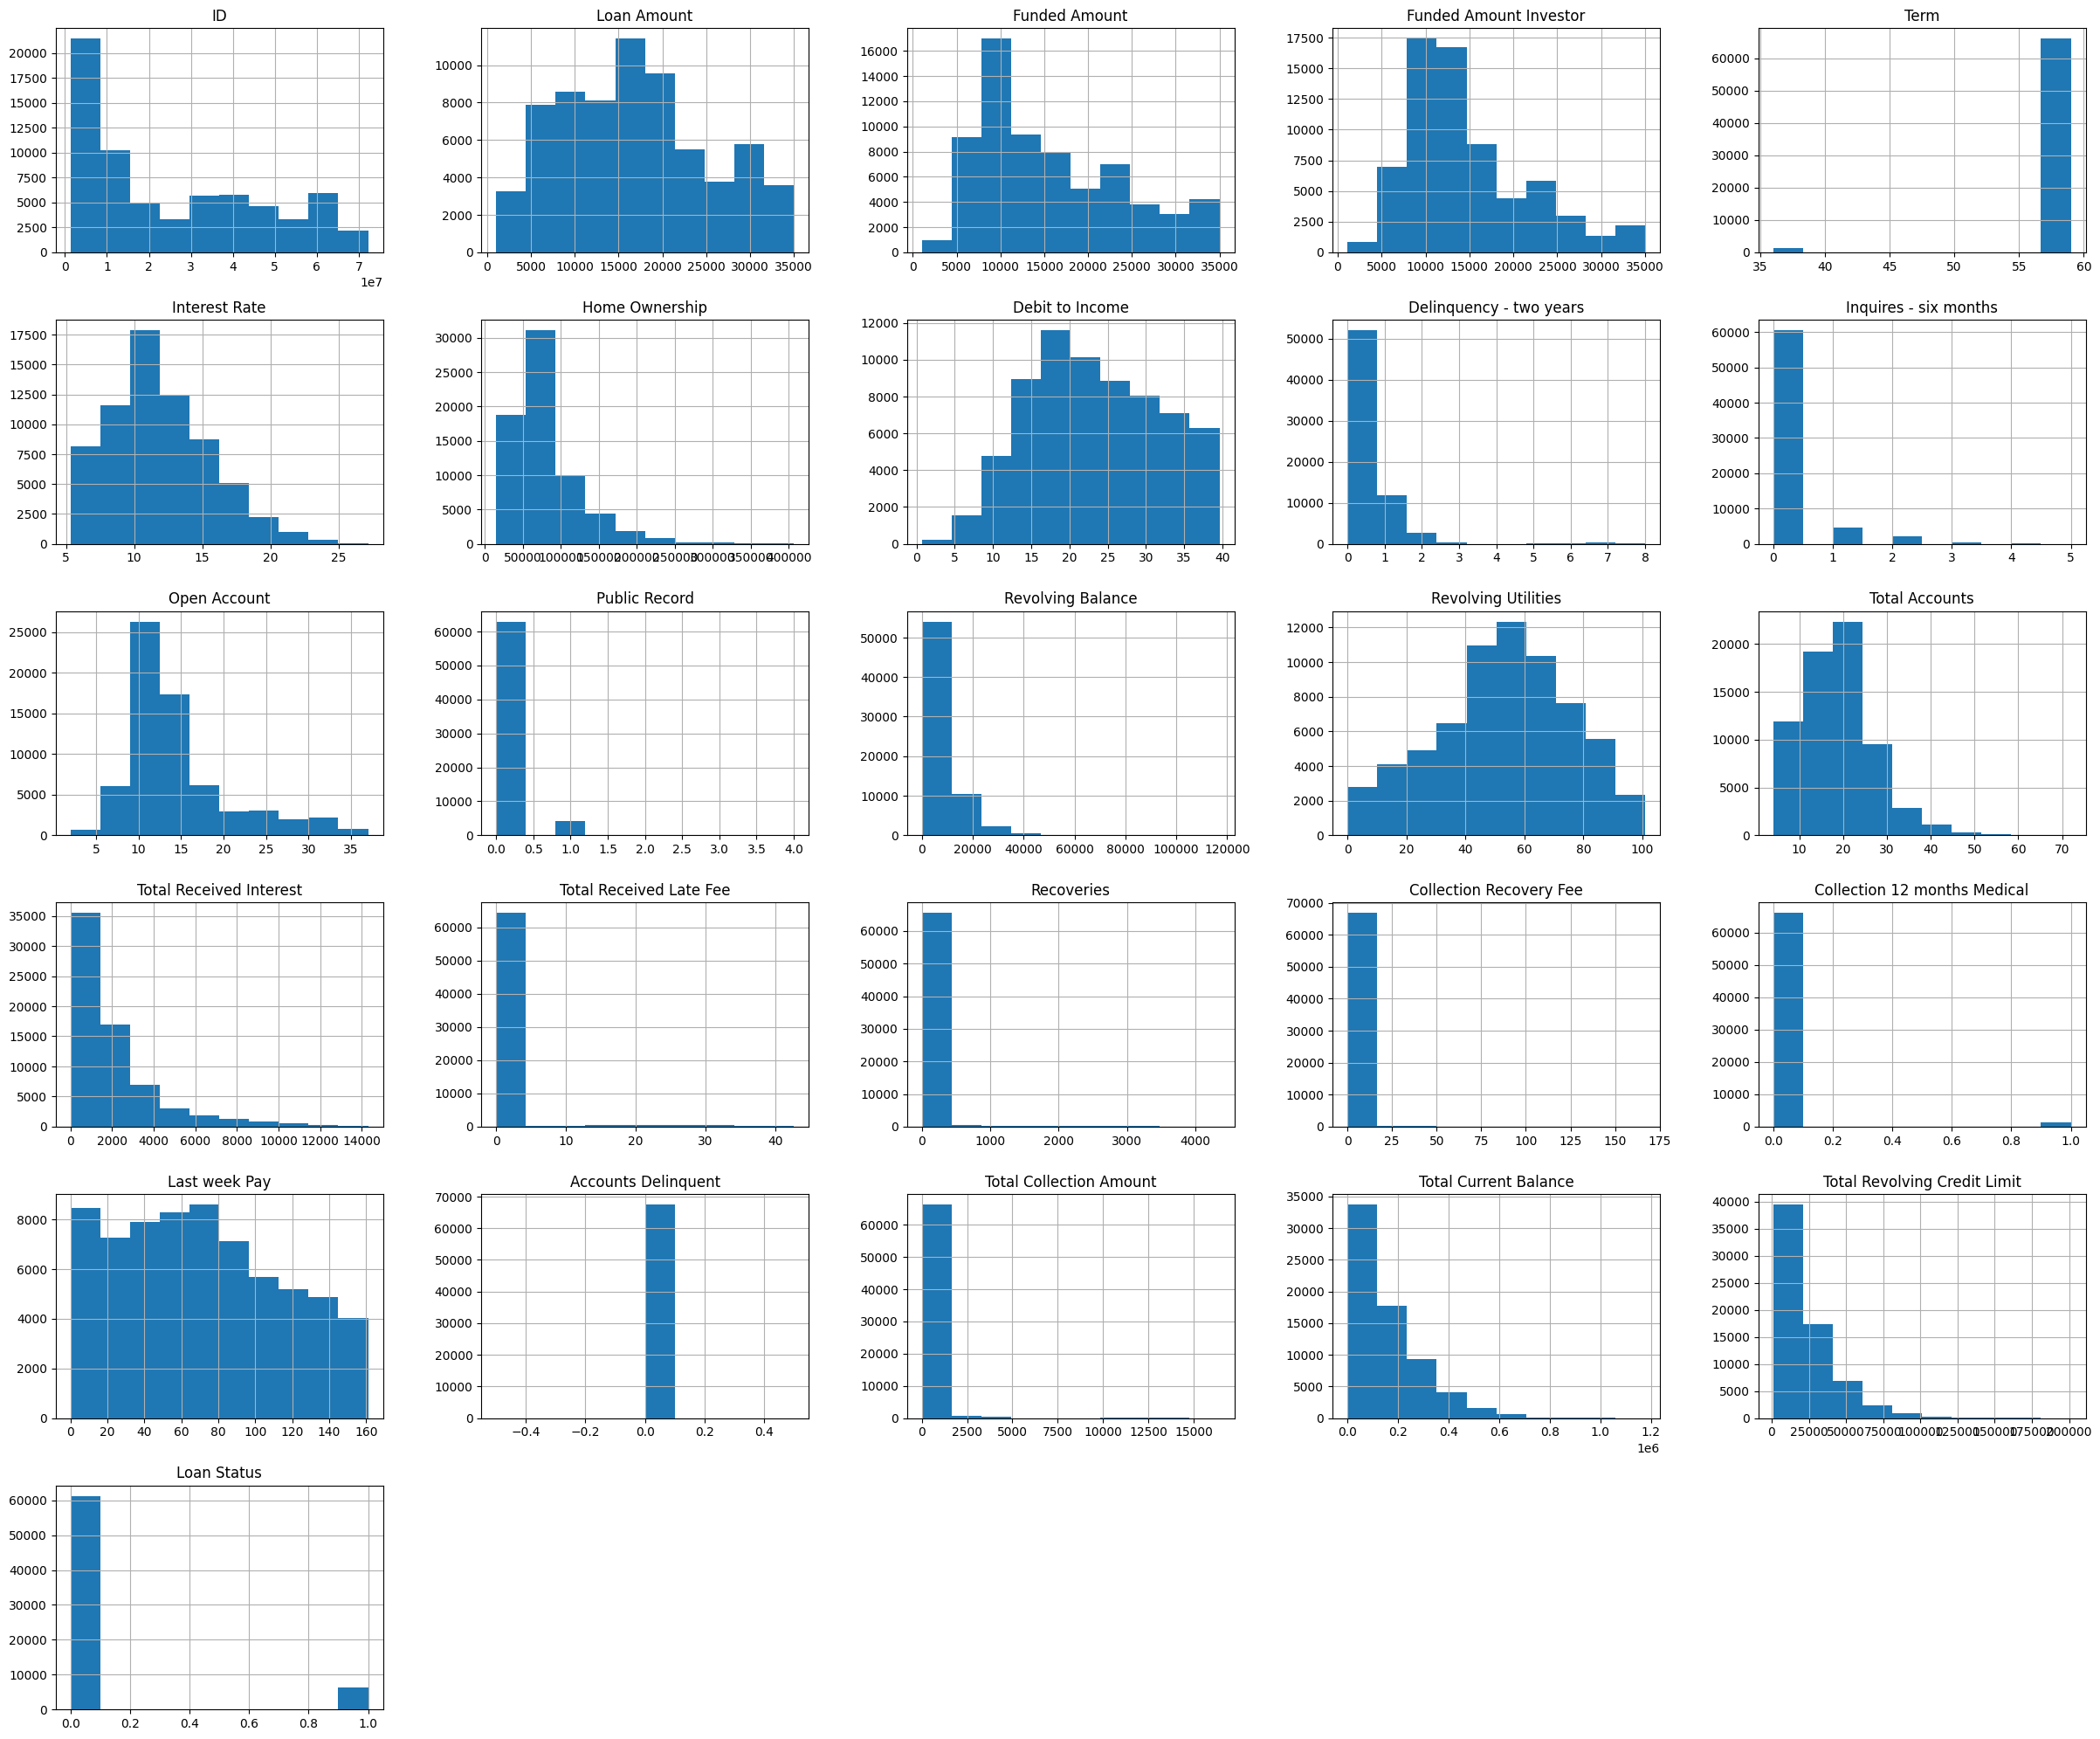

In [10]:
df.hist(figsize=(30,25))

In [11]:
df['Loan Status'].loc[(df['Loan Status']==1)]

15       1
19       1
25       1
44       1
61       1
        ..
67398    1
67402    1
67404    1
67427    1
67458    1
Name: Loan Status, Length: 6241, dtype: int64

<Axes: title={'center': 'Distribution of Target Variable'}, ylabel='Loan Status'>

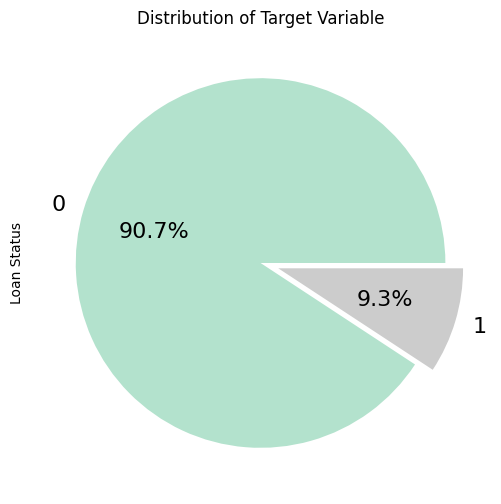

In [12]:
fig = plt.figure(figsize = (11,6))
plt.title("Distribution of Target Variable")
df["Loan Status"].value_counts().plot(kind = "pie", autopct = "%1.1f%%", cmap = 'Pastel2',
                                   textprops={'fontsize': 16}, explode = (0,0.1))

In [13]:
df['Accounts Delinquent'].sum()
# Accounts Delinquent column has a constant value 0 in the dataset

0

In [14]:
df.drop('Accounts Delinquent',axis=1,inplace=True)
# dropping Accounts Delinquent column

In [15]:
len(df['Batch Enrolled'].unique())
# Batch Enrolled has 41 unique values which gives only information of the batch and doesn't relate to target varaible

41

In [16]:
df.drop('Batch Enrolled',axis=1,inplace=True)
# dropping Batch Enrolled column

In [17]:
len(df['ID'].unique())
# Batch Enrolled has 67463 unique values which gives only information of each loan and doesn't relate to target varaible

67463

In [18]:
df.drop('ID',axis=1,inplace=True)
# dropping Batch Enrolled column

In [19]:
df['Payment Plan'].nunique()
# Accounts Delinquent column has a constant value 'n' in the dataset

1

In [20]:
df.drop('Payment Plan',axis=1,inplace=True)
# dropping Payment Plan column

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Interest Rate                 67463 non-null  float64
 5   Grade                         67463 non-null  object 
 6   Sub Grade                     67463 non-null  object 
 7   Employment Duration           67463 non-null  object 
 8   Home Ownership                67463 non-null  float64
 9   Verification Status           67463 non-null  object 
 10  Loan Title                    67463 non-null  object 
 11  Debit to Income               67463 non-null  float64
 12  Delinquency - two years       67463 non-null  int64  
 13  I

In [22]:
df['Application Type'].unique()
# column Application Type has 2 unqiue values. It can be converted to dummy variables

array(['INDIVIDUAL', 'JOINT'], dtype=object)

In [23]:
df['Employment Duration'].unique()
# column Application Type has 3 unqiue values. It can be converted to dummy variables

array(['MORTGAGE', 'RENT', 'OWN'], dtype=object)

In [24]:
# Column name 'Employment Duration' is wrongly assigned to the column 'Home Ownership' and
# there is no suitable column for 'Employement Duraion'. So 'Employment Duration' to be renamed to 'Home Ownership'
# and original 'Home Ownership' column can be dropped
df.drop('Home Ownership',axis=1,inplace=True)

In [25]:
df.rename(columns = {'Employment Duration':'Home Ownership'},inplace=True)


In [26]:
df.columns.values

array(['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Interest Rate', 'Grade', 'Sub Grade', 'Home Ownership',
       'Verification Status', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type',
       'Last week Pay', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit',
       'Loan Status'], dtype=object)

In [27]:
df['Loan Title'].nunique()
# The Loan Title column has 109 unique valued strings in the data which has no influence on the target variable

109

In [28]:
 #Loan Title column can be removed
 df.drop(['Loan Title'],axis=1,inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Interest Rate                 67463 non-null  float64
 5   Grade                         67463 non-null  object 
 6   Sub Grade                     67463 non-null  object 
 7   Home Ownership                67463 non-null  object 
 8   Verification Status           67463 non-null  object 
 9   Debit to Income               67463 non-null  float64
 10  Delinquency - two years       67463 non-null  int64  
 11  Inquires - six months         67463 non-null  int64  
 12  Open Account                  67463 non-null  int64  
 13  P

In [30]:
df['Sub Grade'].nunique()
# there are 35 unqiue values in Sub Grade which will be difficult to convert to numerical

35

In [31]:
df.drop('Sub Grade',axis=1,inplace=True)
# dropping Sub Grade column

In [32]:
df['Verification Status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [33]:
df.loc[df['Verification Status']=='Source Verified','Verification Status']='Verified'

In [34]:
df

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Home Ownership,Verification Status,Debit to Income,Delinquency - two years,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,11.135007,B,MORTGAGE,Not Verified,16.284758,1,...,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,31,311301,6619,0
1,3609,11940,12191.99692,59,12.237563,C,RENT,Verified,15.412409,0,...,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,53,182610,20885,0
2,28276,9311,21603.22455,59,12.545884,F,MORTGAGE,Verified,28.137619,0,...,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,34,89801,26155,0
3,11170,6954,17877.15585,59,16.731201,C,MORTGAGE,Verified,18.043730,1,...,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,40,9189,60214,0
4,16890,13226,13539.92667,59,15.008300,C,MORTGAGE,Verified,17.209886,1,...,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848,13175.28583,59,9.408858,C,MORTGAGE,Verified,28.105127,1,...,0.023478,564.614852,0.865230,0,INDIVIDUAL,69,48,181775,34301,1
67459,8323,11046,15637.46301,59,9.972104,C,RENT,Verified,17.694279,0,...,0.027095,2.015494,1.403368,0,INDIVIDUAL,14,37,22692,8714,0
67460,15897,32921,12329.45775,59,19.650943,A,MORTGAGE,Verified,10.295774,0,...,0.028212,5.673092,1.607093,0,INDIVIDUAL,137,17,176857,42330,0
67461,16567,4975,21353.68465,59,13.169095,D,OWN,Not Verified,7.614624,0,...,0.074508,1.157454,0.207608,0,INDIVIDUAL,73,61,361339,39075,0


In [35]:
df['Verification Status'].unique()

array(['Not Verified', 'Verified'], dtype=object)

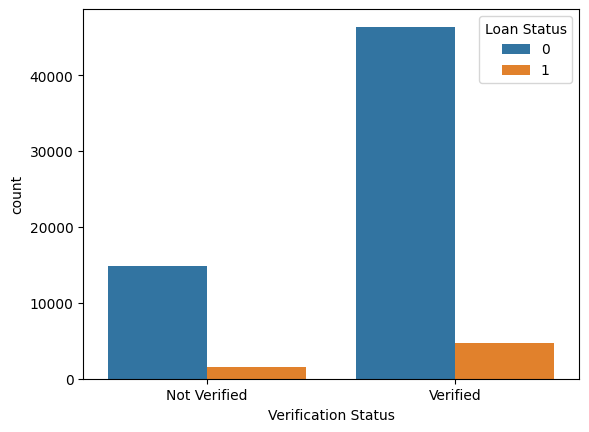

In [36]:
import seaborn as sns
sns.countplot(x='Verification Status', hue='Loan Status',data=df)
plt.show()

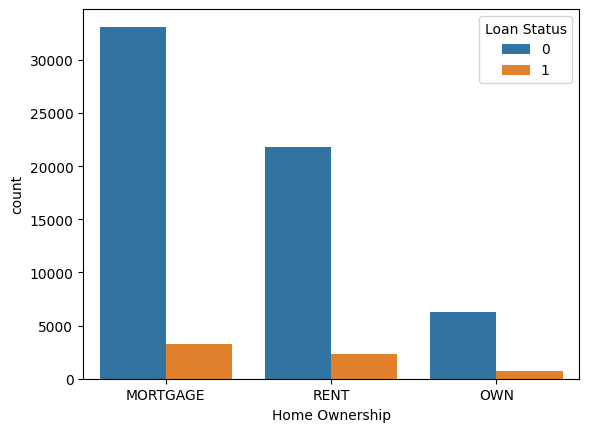

In [37]:
sns.countplot(x='Home Ownership', hue='Loan Status',data=df)
plt.show()

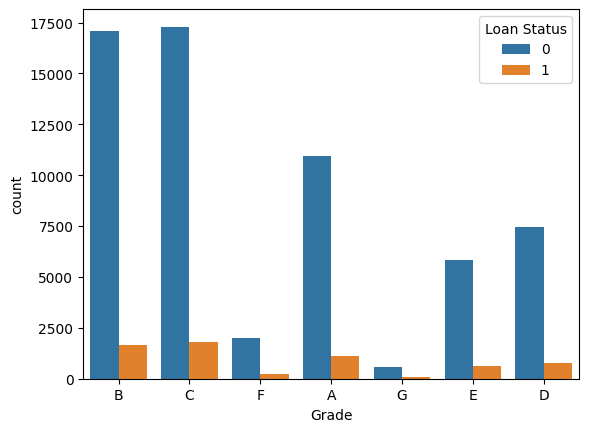

In [38]:
sns.countplot(x='Grade', hue='Loan Status',data=df)
plt.show()

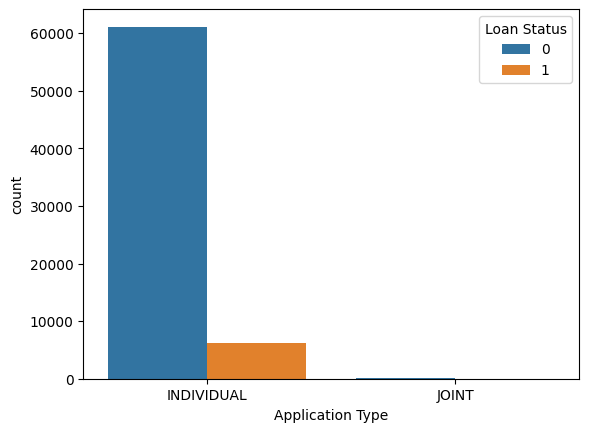

In [39]:
sns.countplot(x='Application Type', hue='Loan Status',data=df)
plt.show()

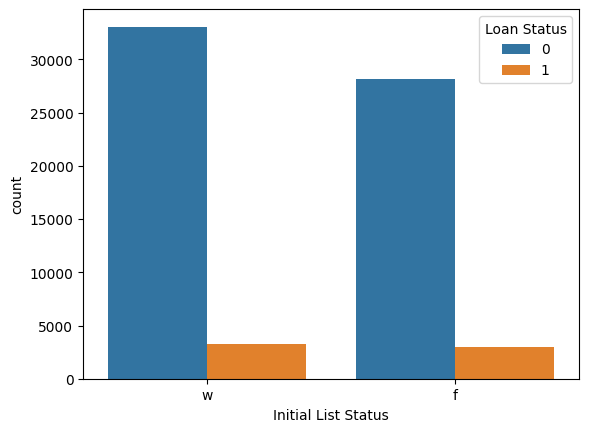

In [40]:
sns.countplot(x='Initial List Status', hue='Loan Status',data=df)
plt.show()

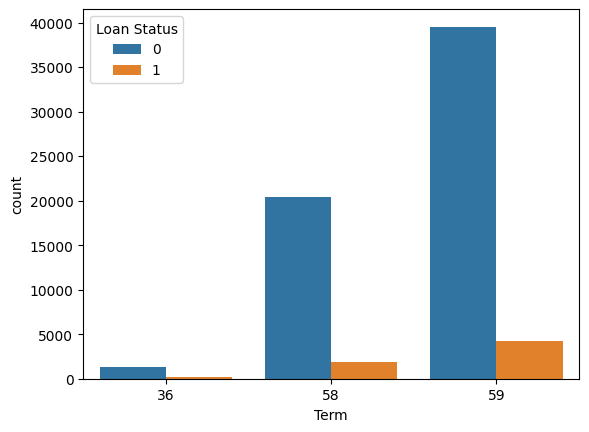

In [41]:
sns.countplot(x='Term', hue='Loan Status',data=df)
plt.show()

<Axes: >

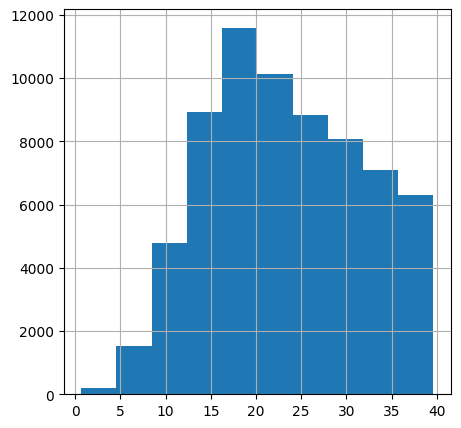

In [42]:
df['Debit to Income'].hist(figsize=(5,5))

<Axes: xlabel='Debit to Income', ylabel='Loan Amount'>

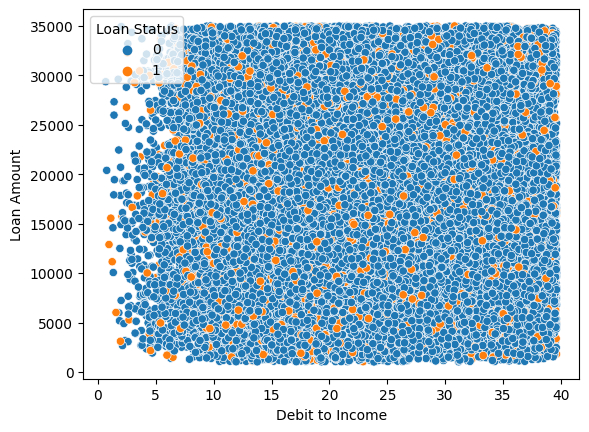

In [43]:
sns.scatterplot(data=df, x='Debit to Income', y='Loan Amount', hue = 'Loan Status')

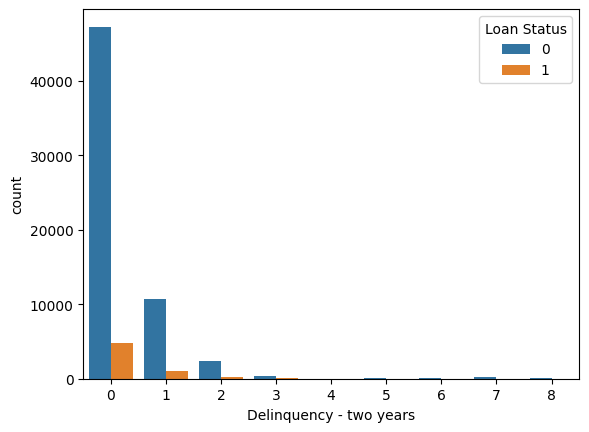

In [44]:
sns.countplot(x='Delinquency - two years', hue='Loan Status',data=df)
plt.show()

In [45]:
df['Inquires - six months'].unique()

array([0, 3, 2, 1, 4, 5])

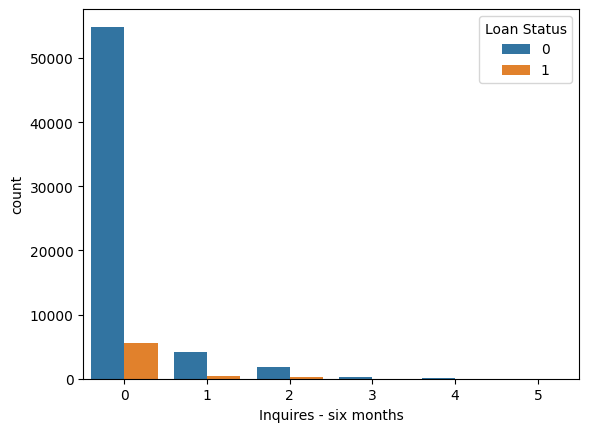

In [46]:
sns.countplot(x='Inquires - six months', hue='Loan Status',data=df)
plt.show()

In [47]:
df['Open Account'].nunique()

36

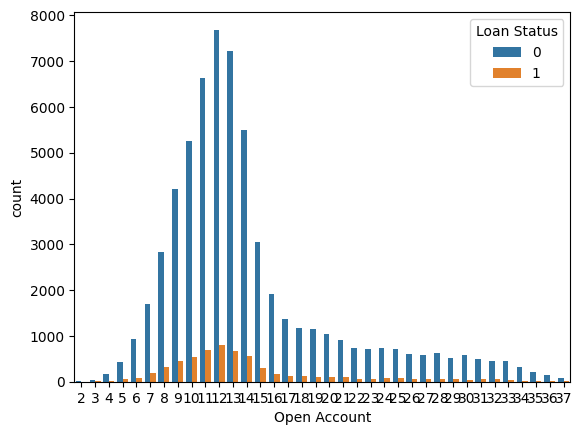

In [48]:
sns.countplot(x='Open Account', hue='Loan Status',data=df)
plt.show()

In [49]:
df.corr()

<ipython-input-49-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,...,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
Loan Amount,1.000000,-0.000551,0.002831,0.004277,-0.004888,0.007959,-0.000469,0.008962,0.009088,-0.002542,...,-0.001887,-0.000034,-0.001606,-0.002142,-0.002726,-0.002362,-0.004135,-0.008285,0.002289,-0.004473
Funded Amount,-0.000551,1.000000,0.010227,-0.001503,0.002310,0.002347,0.011313,-0.001587,0.005755,0.003750,...,0.002759,0.001542,0.000462,0.000175,0.001071,-0.003476,-0.002821,-0.001499,0.006145,0.001364
Funded Amount Investor,0.002831,0.010227,1.000000,-0.008943,-0.001917,0.000112,0.001925,-0.003073,-0.007850,0.005002,...,0.001432,-0.000232,0.000966,-0.007272,0.001814,0.004248,0.006862,0.003283,0.005669,-0.000091
Term,0.004277,-0.001503,-0.008943,1.000000,-0.012688,0.001026,-0.004494,-0.005272,0.021362,-0.002827,...,0.008663,-0.000736,-0.003475,-0.001203,-0.003263,0.007035,0.000358,0.003361,-0.005068,-0.003410
Interest Rate,-0.004888,0.002310,-0.001917,-0.012688,1.000000,-0.011203,0.004045,0.009172,-0.003250,0.006979,...,0.006998,0.003119,0.009348,0.001281,-0.009895,-0.012652,0.002771,-0.002567,0.016651,0.002900
Debit to Income,0.007959,0.002347,0.000112,0.001026,-0.011203,1.000000,-0.004007,0.002246,0.001100,-0.007813,...,0.006504,-0.010224,-0.009693,0.002200,-0.000716,0.008639,0.001555,-0.011582,-0.007236,-0.003057
Delinquency - two years,-0.000469,0.011313,0.001925,-0.004494,0.004045,-0.004007,1.000000,0.014679,0.004904,0.006716,...,-0.004511,0.007943,0.017348,0.002707,0.003451,0.001160,0.005642,0.002602,0.009315,0.009990
Inquires - six months,0.008962,-0.001587,-0.003073,-0.005272,0.009172,0.002246,0.014679,1.000000,-0.002109,0.004087,...,0.009556,0.008296,0.012487,0.008388,-0.004436,-0.004453,-0.002210,0.001531,0.004678,0.000578
Open Account,0.009088,0.005755,-0.007850,0.021362,-0.003250,0.001100,0.004904,-0.002109,1.000000,-0.010762,...,0.012980,0.000828,-0.001216,-0.006832,0.003397,-0.013415,-0.006176,-0.007470,0.003096,-0.007073
Public Record,-0.002542,0.003750,0.005002,-0.002827,0.006979,-0.007813,0.006716,0.004087,-0.010762,1.000000,...,0.001283,0.016594,0.008905,0.004725,0.008878,0.004281,0.012928,0.003935,0.012046,0.010590


In [50]:
df['Term'].unique()

array([59, 36, 58])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Interest Rate                 67463 non-null  float64
 5   Grade                         67463 non-null  object 
 6   Home Ownership                67463 non-null  object 
 7   Verification Status           67463 non-null  object 
 8   Debit to Income               67463 non-null  float64
 9   Delinquency - two years       67463 non-null  int64  
 10  Inquires - six months         67463 non-null  int64  
 11  Open Account                  67463 non-null  int64  
 12  Public Record                 67463 non-null  int64  
 13  R

In [52]:
df['Delinquency - two years'].unique()

array([1, 0, 3, 6, 2, 7, 5, 4, 8])

In [53]:
df.columns

Index(['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Interest Rate', 'Grade', 'Home Ownership', 'Verification Status',
       'Debit to Income', 'Delinquency - two years', 'Inquires - six months',
       'Open Account', 'Public Record', 'Revolving Balance',
       'Revolving Utilities', 'Total Accounts', 'Initial List Status',
       'Total Received Interest', 'Total Received Late Fee', 'Recoveries',
       'Collection Recovery Fee', 'Collection 12 months Medical',
       'Application Type', 'Last week Pay', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [54]:
df1=df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Interest Rate                 67463 non-null  float64
 5   Grade                         67463 non-null  object 
 6   Home Ownership                67463 non-null  object 
 7   Verification Status           67463 non-null  object 
 8   Debit to Income               67463 non-null  float64
 9   Delinquency - two years       67463 non-null  int64  
 10  Inquires - six months         67463 non-null  int64  
 11  Open Account                  67463 non-null  int64  
 12  Public Record                 67463 non-null  int64  
 13  R

In [55]:
df1.drop(['Grade','Home Ownership','Verification Status','Initial List Status','Application Type'],axis=1,inplace=True)

In [56]:

  Q1 = df1['Total Collection Amount'].quantile(0.25)
  Q3 = df1['Total Collection Amount'].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df1['Total Collection Amount'][(df1['Total Collection Amount'] < lower_bound) | (df1['Total Collection Amount'] > upper_bound)]
  outliers
  upper_bound

79.0

In [57]:
for col in df1.columns:
  Q1 = df1[col].quantile(0.25)
  Q3 = df1[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df1[col][(df1[col] < lower_bound) | (df1[col] > upper_bound)]
  print(col, end='\t\t\t')
  print(outliers.count())

Loan Amount			0
Funded Amount			0
Funded Amount Investor			3103
Term			1457
Interest Rate			851
Debit to Income			0
Delinquency - two years			15409
Inquires - six months			6977
Open Account			5614
Public Record			4592
Revolving Balance			3719
Revolving Utilities			0
Total Accounts			1424
Total Received Interest			4978
Total Received Late Fee			3374
Recoveries			2302
Collection Recovery Fee			809
Collection 12 months Medical			1437
Last week Pay			0
Total Collection Amount			4790
Total Current Balance			1971
Total Revolving Credit Limit			2689
Loan Status			6241


In [58]:
df['Delinquency - two years'].unique()
# as the column 'Delinquency - two years' has highest number of outliers, better to drop this column
df.drop('Delinquency - two years',axis=1,inplace=True)

In [59]:
df1.drop('Delinquency - two years',axis=1,inplace=True)

In [60]:
df['Public Record'].unique()
# the frequency of 0 is very high that if we drop the outliers, the only value in this column will be 0. So 'Public Record' column also can be dropped.
df.drop('Public Record',axis=1,inplace=True)

In [61]:
df1.drop('Public Record',axis=1,inplace=True)

In [62]:
df['Inquires - six months'].unique()
# as the column 'Inquires - six months' has more number of outliers, better to drop this column
df.drop('Inquires - six months',axis=1,inplace=True)

In [63]:
df1.drop('Inquires - six months',axis=1,inplace=True)

In [64]:
df['Collection 12 months Medical'].unique()
# the frequency of 0 is very high that if we drop the outliers, the only value in this column will be 0. So 'Collection 12 months Medical' column also can be dropped.
df.drop('Collection 12 months Medical',axis=1,inplace=True)

In [65]:
df1.drop('Collection 12 months Medical',axis=1,inplace=True)

In [66]:
df['Term'].unique()
# as there are only 3 unique values, it can be considered as categorical
df['Term']=df['Term'].astype('object')
# print(df.dtypes)

In [67]:
df1['Term'].unique()
# as there are only 3 unique values, it can be considered as categorical
df1['Term']=df1['Term'].astype('object')
# print(df.dtypes)

In [68]:
#Between the tradeoff in dropping the outlier rows and dropping the columns, if there is outlier count more than 5%, it is decided to drop the column

In [69]:
#open account has more than 5% of outliers. so dropping the column
df.drop('Open Account',axis=1,inplace=True)
df1.drop('Open Account',axis=1,inplace=True)

In [70]:
#Revolvling balance  has more than 5% of outliers. so dropping the column
df.drop('Revolving Balance',axis=1,inplace=True)
df1.drop('Revolving Balance',axis=1,inplace=True)

In [71]:
#Total Received Interest  has more than 5% of outliers. so dropping the column
df.drop('Total Received Interest',axis=1,inplace=True)
df1.drop('Total Received Interest',axis=1,inplace=True)

In [72]:
#Total Received Late Fee  has more than 5% of outliers. so dropping the column
df.drop('Total Received Late Fee',axis=1,inplace=True)
df1.drop('Total Received Late Fee',axis=1,inplace=True)

In [73]:
#Total Collection Amount  has more than 5% of outliers. so dropping the column
df.drop('Total Collection Amount',axis=1,inplace=True)
df1.drop('Total Collection Amount',axis=1,inplace=True)

In [74]:
#Though Recoveries has less number of outliers, by seeing the histogram, there is wide spread of outliers, so it is not correct to apply standard scaler so dropping the column
df.drop('Recoveries',axis=1,inplace=True)
df1.drop('Recoveries',axis=1,inplace=True)

In [75]:
for col in df1.columns:
  Q1 = df1[col].quantile(0.1)
  Q3 = df1[col].quantile(0.9)
  IQR = Q3 - Q1
  lower_bound = Q1 - 3 * IQR
  upper_bound = Q3 + 3 * IQR
  outliers = df1[col][(df1[col] < lower_bound) | (df1[col] > upper_bound)]
  print(col, end='\t\t\t')
  print(outliers.count())

Loan Amount			0
Funded Amount			0
Funded Amount Investor			0
Term			1457
Interest Rate			0
Debit to Income			0
Revolving Utilities			0
Total Accounts			0
Collection Recovery Fee			803
Last week Pay			0
Total Current Balance			0
Total Revolving Credit Limit			9
Loan Status			6241


array([[<Axes: title={'center': 'Loan Amount'}>,
        <Axes: title={'center': 'Funded Amount'}>,
        <Axes: title={'center': 'Funded Amount Investor'}>],
       [<Axes: title={'center': 'Interest Rate'}>,
        <Axes: title={'center': 'Debit to Income'}>,
        <Axes: title={'center': 'Revolving Utilities'}>],
       [<Axes: title={'center': 'Total Accounts'}>,
        <Axes: title={'center': 'Collection Recovery Fee'}>,
        <Axes: title={'center': 'Last week Pay'}>],
       [<Axes: title={'center': 'Total Current Balance'}>,
        <Axes: title={'center': 'Total Revolving Credit Limit'}>,
        <Axes: title={'center': 'Loan Status'}>]], dtype=object)

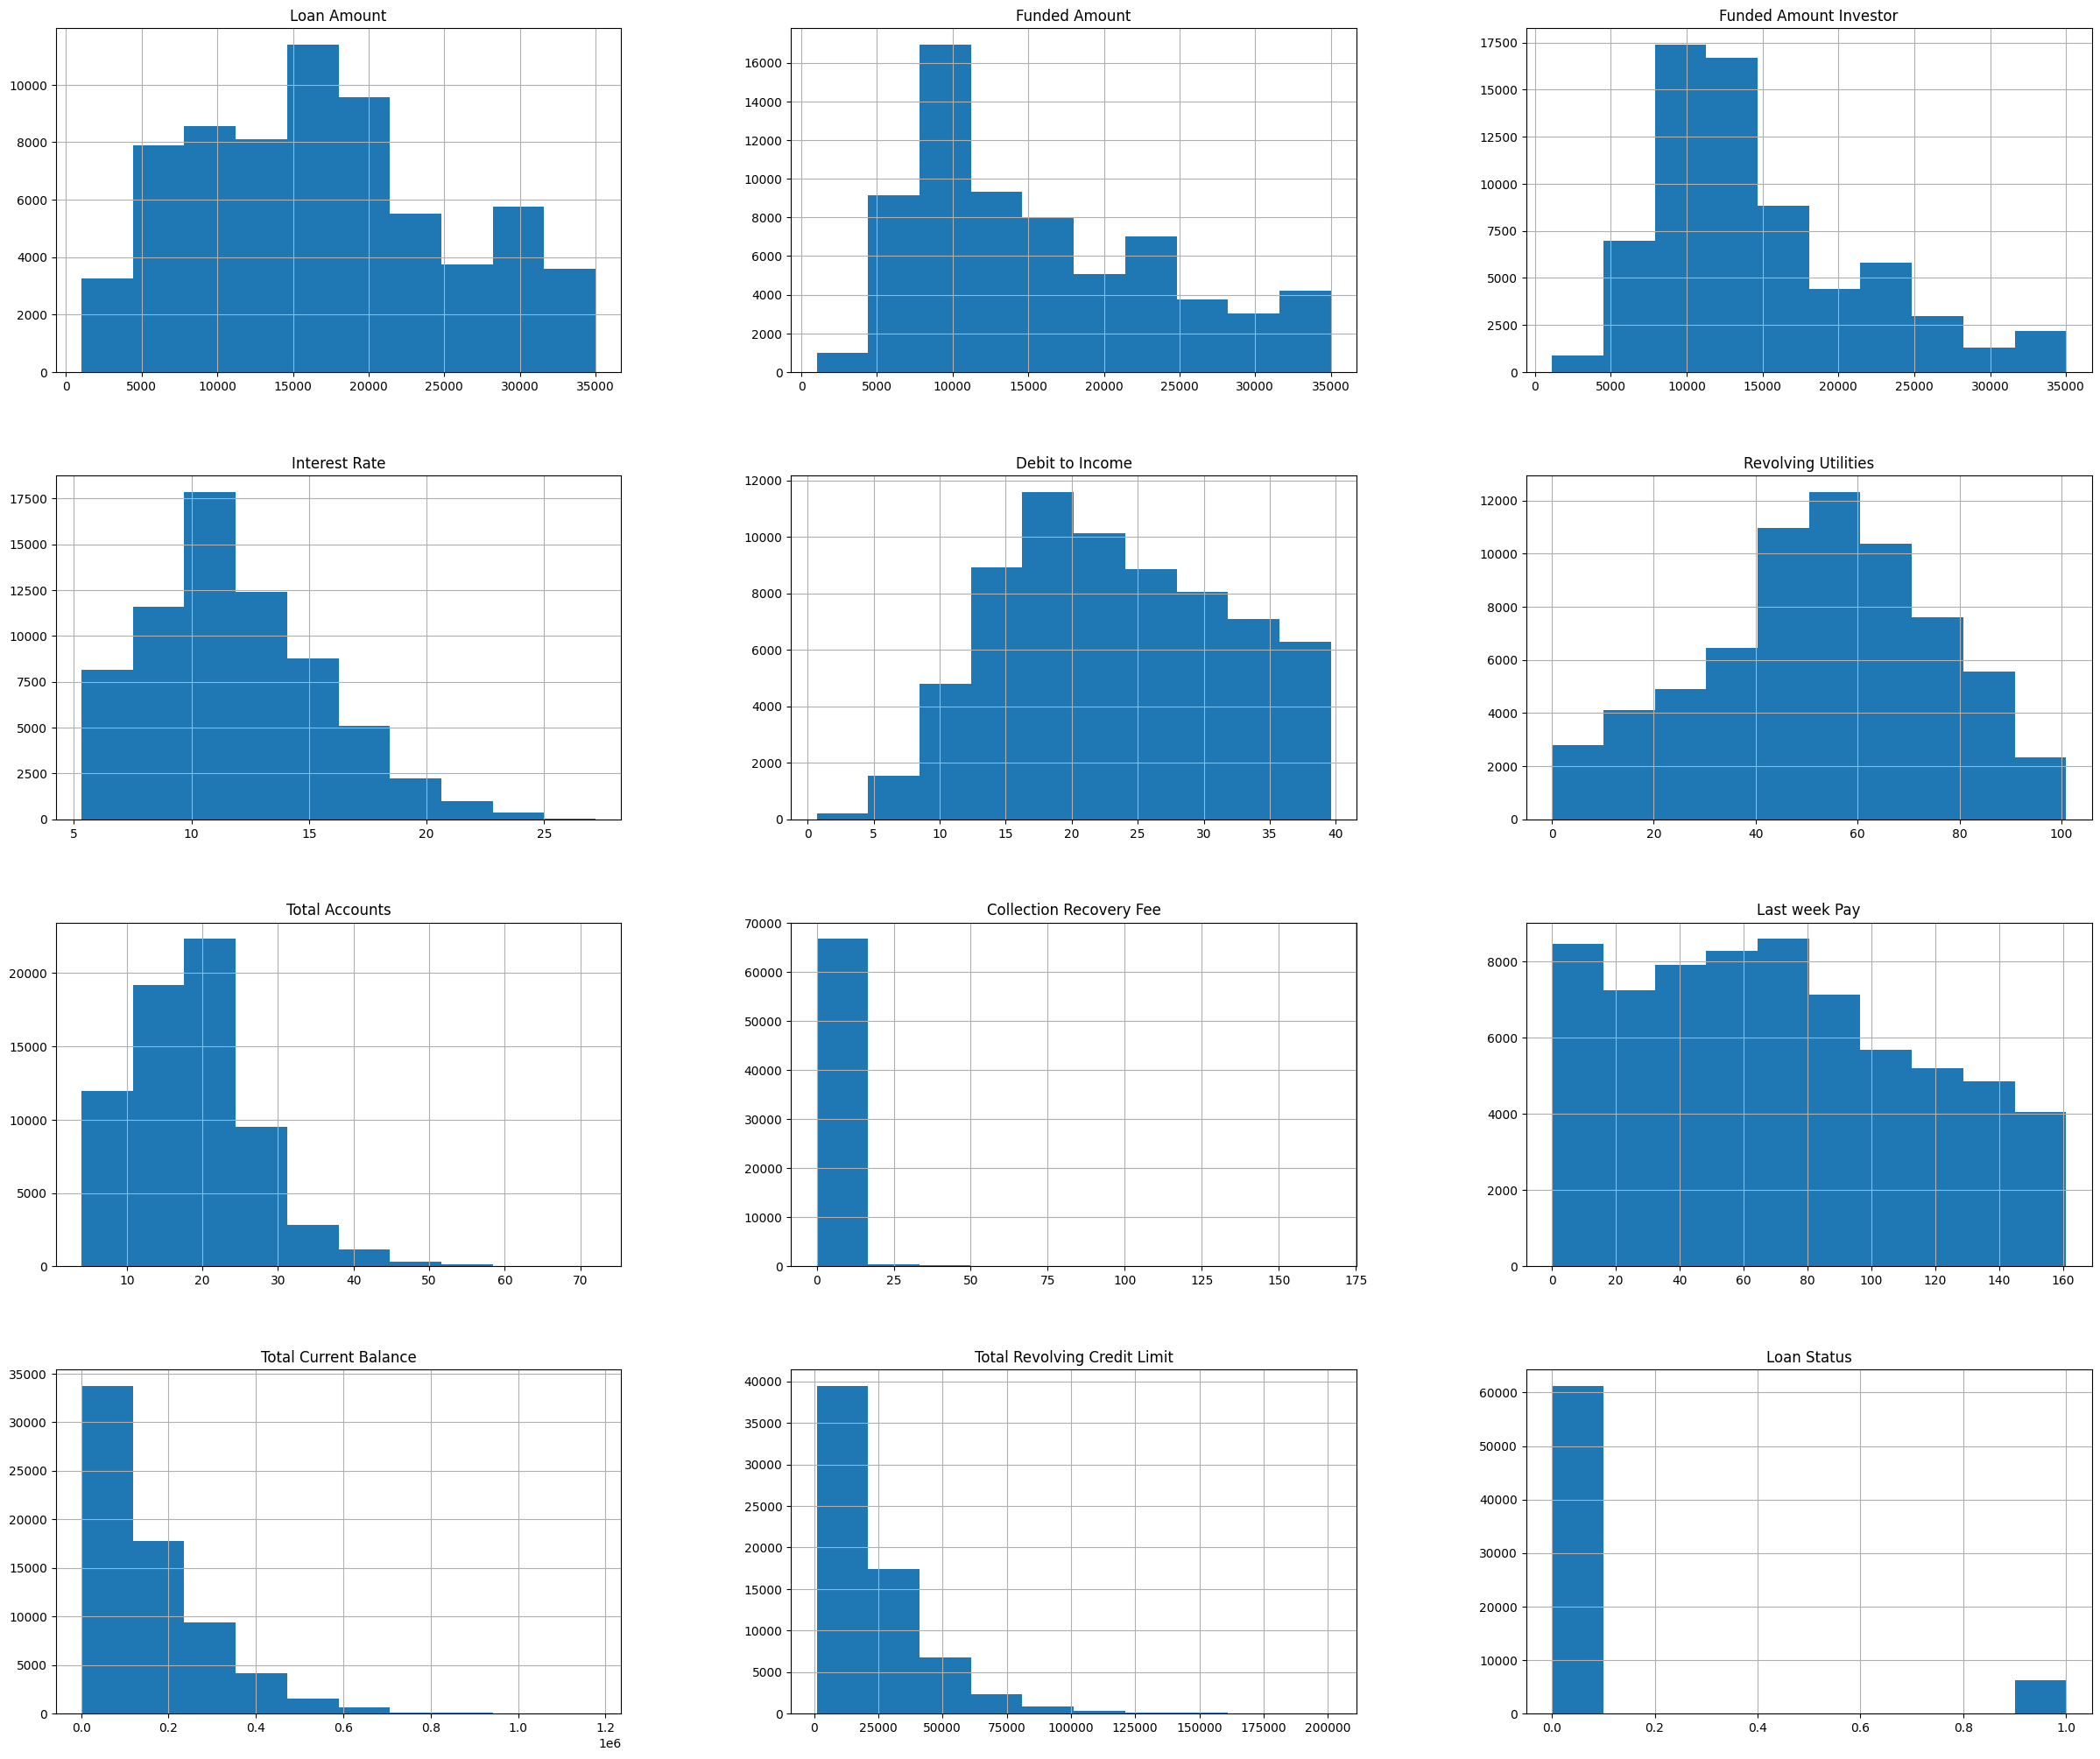

In [76]:
df.hist(figsize=(30,25))

In [77]:
df_encoded = pd.get_dummies(df[['Term','Grade','Home Ownership','Verification Status','Initial List Status','Application Type']])

<ipython-input-77-5deaab404f87>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_encoded = pd.get_dummies(df[['Term','Grade','Home Ownership','Verification Status','Initial List Status','Application Type']])


In [78]:
df_encoded

,Term_36,Term_58,Term_59,Grade_A,Grade_B,Grade_C,Grade_D,Grade_E,Grade_F,Grade_G,Home Ownership_MORTGAGE,Home Ownership_OWN,Home Ownership_RENT,Verification Status_Not Verified,Verification Status_Verified,Initial List Status_f,Initial List Status_w,Application Type_INDIVIDUAL,Application Type_JOINT
0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0
1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0
2,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0
67459,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0
67460,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
67461,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0


In [79]:
df.drop(['Term','Grade','Home Ownership','Verification Status','Initial List Status','Application Type'],axis=1,inplace=True)

In [80]:
df=pd.concat([df,df_encoded],axis=1)

In [81]:
y=df['Loan Status']

In [82]:
X = df.drop(['Loan Status'],axis=1)

In [83]:
X

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Debit to Income,Revolving Utilities,Total Accounts,Collection Recovery Fee,Last week Pay,Total Current Balance,...,Grade_G,Home Ownership_MORTGAGE,Home Ownership_OWN,Home Ownership_RENT,Verification Status_Not Verified,Verification Status_Verified,Initial List Status_f,Initial List Status_w,Application Type_INDIVIDUAL,Application Type_JOINT
0,10000,32236,12329.36286,11.135007,16.284758,74.932551,7,0.793724,49,311301,...,0,1,0,0,1,0,0,1,1,0
1,3609,11940,12191.99692,12.237563,15.412409,78.297186,13,0.974821,109,182610,...,0,0,0,1,0,1,1,0,1,0
2,28276,9311,21603.22455,12.545884,28.137619,2.073040,20,1.020075,66,89801,...,0,1,0,0,0,1,0,1,1,0
3,11170,6954,17877.15585,16.731201,18.043730,67.467951,12,0.749971,39,9189,...,0,1,0,0,0,1,0,1,1,0
4,16890,13226,13539.92667,15.008300,17.209886,85.250761,22,0.368953,18,126029,...,0,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,13601,6848,13175.28583,9.408858,28.105127,97.779389,19,0.865230,69,181775,...,0,1,0,0,0,1,0,1,1,0
67459,8323,11046,15637.46301,9.972104,17.694279,15.690703,14,1.403368,14,22692,...,0,0,0,1,0,1,0,1,1,0
67460,15897,32921,12329.45775,19.650943,10.295774,1.500090,9,1.607093,137,176857,...,0,1,0,0,0,1,0,1,1,0
67461,16567,4975,21353.68465,13.169095,7.614624,68.481882,15,0.207608,73,361339,...,0,0,1,0,1,0,1,0,1,0


In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
print(X_train.shape, X_test.shape)

(53970, 30) (13493, 30)


# Logistic Regression with random sampling

In [85]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [86]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
model=lr.fit(X_train_std, y_train)

# Slide 9
y_pred = lr.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [87]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[12243     0]
 [ 1250     0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12243
           1       0.00      0.00      0.00      1250

    accuracy                           0.91     13493
   macro avg       0.45      0.50      0.48     13493
weighted avg       0.82      0.91      0.86     13493



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC: 0.5299751368128727


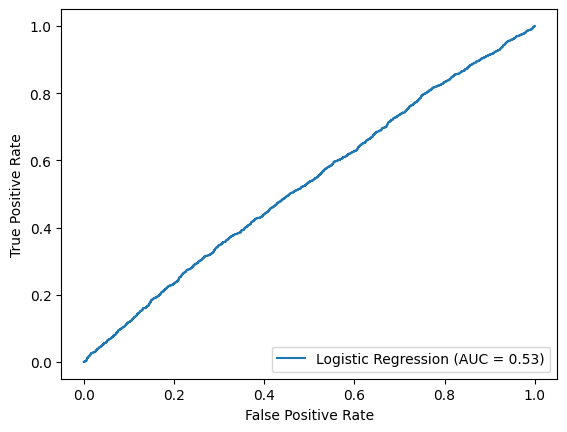

In [88]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# predict probabilities on test set
y_pred_proba = model.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Logistic Regression')
roc_display.plot()
plt.show()

In [89]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred)

3.339106702467683

# Logistic Regression with Stratified Sampling

In [90]:
from imblearn.under_sampling import NearMiss
undersampler = NearMiss(version = 1, n_neighbors = 3)
X_resampled_train, y_resampled_train = undersampler.fit_resample(X_train, y_train)
print(X_resampled_train.shape, y_resampled_train.shape)
print('*****y_resampled_train*****')
print(y_resampled_train.value_counts())
print('*****y_train*****')
print(y_train.value_counts())

(9982, 30) (9982,)
*****y_resampled_train*****
0    4991
1    4991
Name: Loan Status, dtype: int64
*****y_train*****
0    48979
1     4991
Name: Loan Status, dtype: int64


In [91]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_resampled_train)
X_resampled_train_std = sc.transform(X_resampled_train)
# X_resampled_test_std = sc.transform(X_resampled_test)

In [92]:
print(X_resampled_train.shape, y_resampled_train.shape)

(9982, 30) (9982,)


In [93]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_resampled_train_std, y_resampled_train)

# Slide 9
y_pred = lr.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.50


In [94]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6114 6129]
 [ 610  640]]
              precision    recall  f1-score   support

           0       0.91      0.50      0.64     12243
           1       0.09      0.51      0.16      1250

    accuracy                           0.50     13493
   macro avg       0.50      0.51      0.40     13493
weighted avg       0.83      0.50      0.60     13493



AUC: 0.5077888099322061


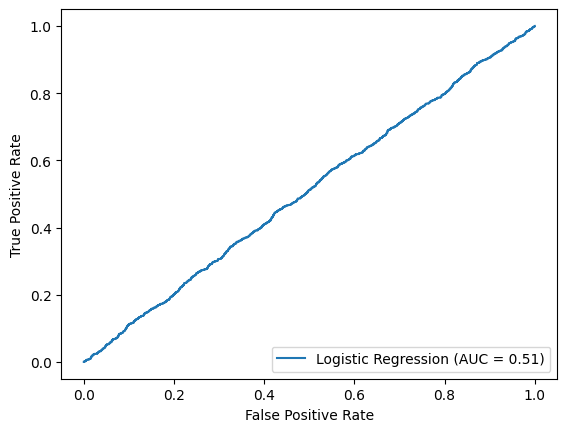

In [95]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# predict probabilities on test set
y_pred_proba = lr.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Logistic Regression')
roc_display.plot()
plt.show()

In [96]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred)

18.001792054343767

# Perceptron with random sampling

In [97]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40)

In [98]:
# USE THIS FOR PERCEPTRON
y_pred = ppn.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.82


In [99]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11016  1227]
 [ 1141   109]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90     12243
           1       0.08      0.09      0.08      1250

    accuracy                           0.82     13493
   macro avg       0.49      0.49      0.49     13493
weighted avg       0.83      0.82      0.83     13493



AUC: 0.5299751368128727


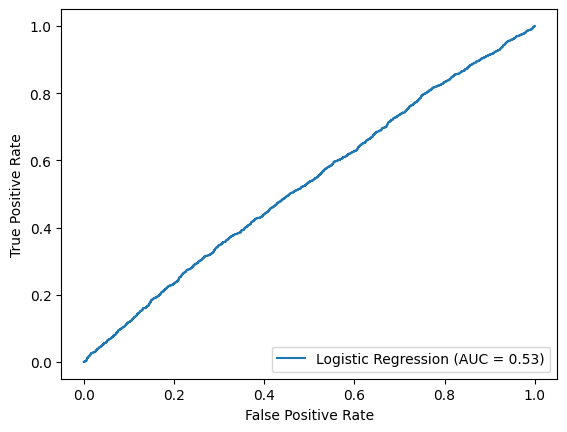

In [100]:
# predict probabilities on test set
y_pred_proba = model.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Logistic Regression')
roc_display.plot()
plt.show()

# Decision Tree Model with random sampling

In [101]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_std, y_train)

DecisionTreeClassifier(random_state=0)

In [102]:
y_pred = dt.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.82


In [103]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10870  1373]
 [ 1108   142]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     12243
           1       0.09      0.11      0.10      1250

    accuracy                           0.82     13493
   macro avg       0.50      0.50      0.50     13493
weighted avg       0.83      0.82      0.82     13493



AUC: 0.5007271420403495


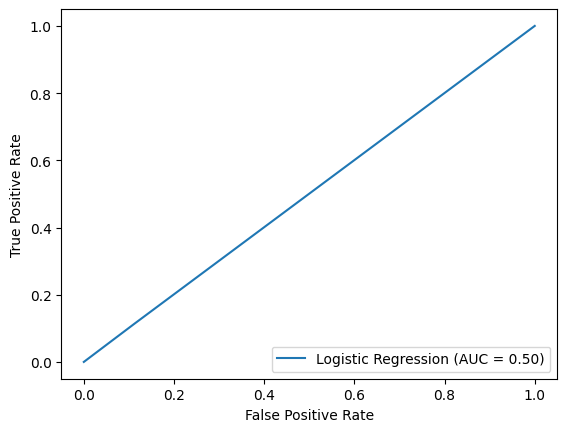

In [104]:
y_pred_proba = dt.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Logistic Regression')
roc_display.plot()
plt.show()

In [105]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred)

6.627458983057857

# Descision Tree Model with Stratified Sampling

In [106]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_resampled_train_std, y_resampled_train)

DecisionTreeClassifier(random_state=0)

In [107]:
y_pred = dt.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.38


In [108]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[4282 7961]
 [ 422  828]]
              precision    recall  f1-score   support

           0       0.91      0.35      0.51     12243
           1       0.09      0.66      0.16      1250

    accuracy                           0.38     13493
   macro avg       0.50      0.51      0.34     13493
weighted avg       0.83      0.38      0.47     13493



AUC: 0.5060754390263824


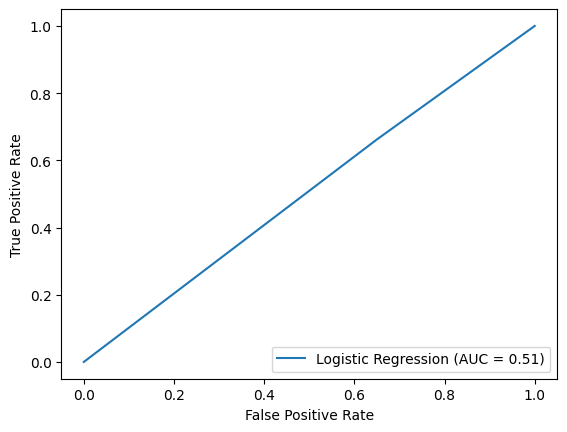

In [109]:
y_pred_proba = dt.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Logistic Regression')
roc_display.plot()
plt.show()

In [110]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred)

22.393385189429264

# Random Forest Model with random sampling

In [111]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_std, y_train)

RandomForestClassifier(random_state=42)

In [112]:
y_pred = rfc.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [113]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[12243     0]
 [ 1250     0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12243
           1       0.00      0.00      0.00      1250

    accuracy                           0.91     13493
   macro avg       0.45      0.50      0.48     13493
weighted avg       0.82      0.91      0.86     13493



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC: 0.5152224128073186


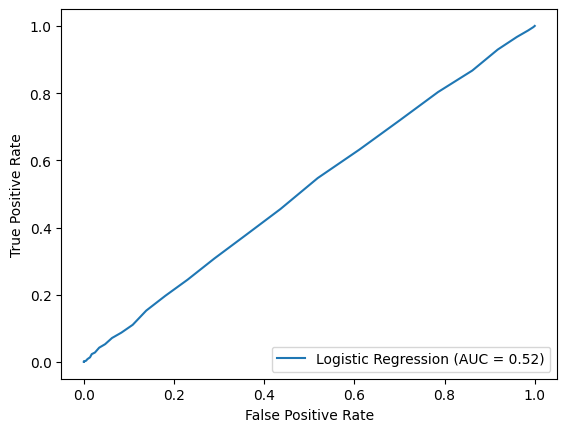

In [114]:
y_pred_proba = rfc.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Logistic Regression')
roc_display.plot()
plt.show()

In [115]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred)

3.339106702467683

# Random Forest Model with stratified sampling

In [116]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_resampled_train_std, y_resampled_train)

RandomForestClassifier(random_state=42)

In [117]:
y_pred = rfc.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.40


In [118]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[4628 7615]
 [ 441  809]]
              precision    recall  f1-score   support

           0       0.91      0.38      0.53     12243
           1       0.10      0.65      0.17      1250

    accuracy                           0.40     13493
   macro avg       0.50      0.51      0.35     13493
weighted avg       0.84      0.40      0.50     13493



AUC: 0.5121208200604427


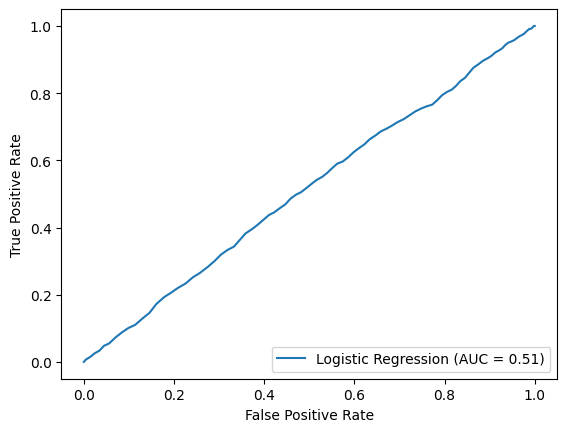

In [119]:
y_pred_proba = rfc.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Logistic Regression')
roc_display.plot()
plt.show()

In [120]:
importances = rfc.feature_importances_

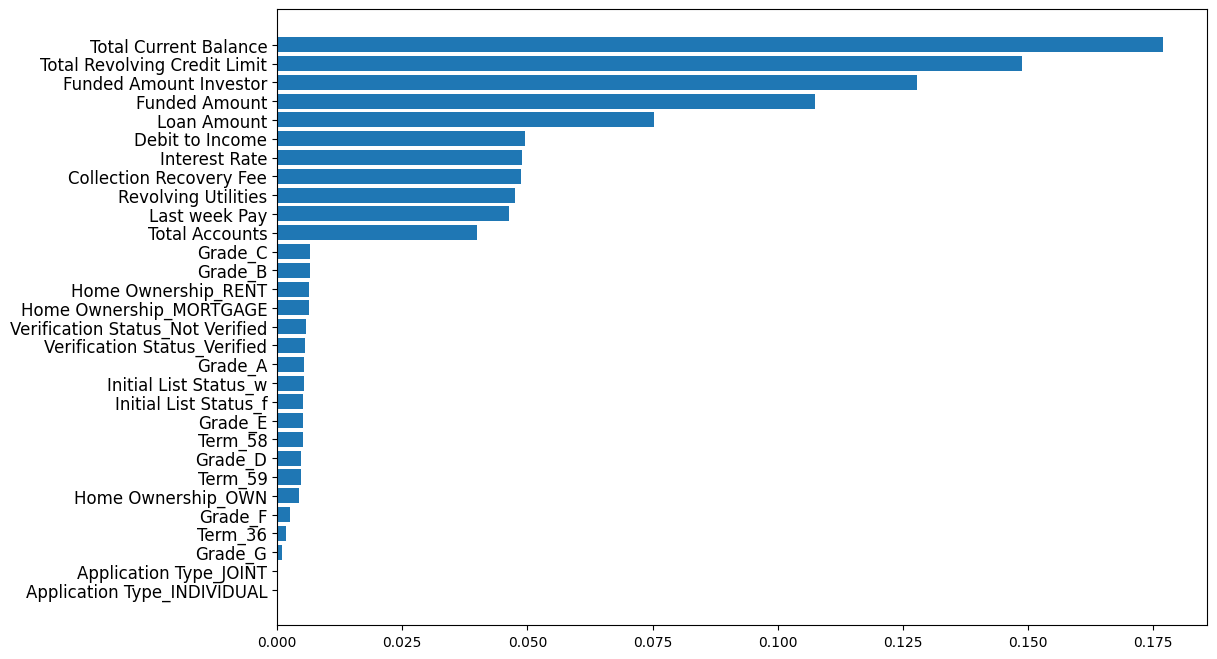

In [121]:
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize = (12, 8))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_resampled_train.columns)[indices], size = 12)

In [122]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred)

21.519874876063717

In [123]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Random Forest with SMOTE

In [124]:
from imblearn.over_sampling import SMOTE
X_resampled_train_smote, y_resampled_train_smote = SMOTE().fit_resample(X_train, y_train)

In [125]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_resampled_train_smote)
X_resampled_train_smote_std = sc.transform(X_resampled_train_smote)
# X_resampled_test_std = sc.transform(X_resampled_test)

In [126]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1, random_state=42)
rfc.fit(X_resampled_train_smote_std, y_resampled_train_smote)

RandomForestClassifier(n_estimators=1, random_state=42)

In [127]:
y_pred = rfc.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.81


In [128]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10761  1482]
 [ 1114   136]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89     12243
           1       0.08      0.11      0.09      1250

    accuracy                           0.81     13493
   macro avg       0.50      0.49      0.49     13493
weighted avg       0.83      0.81      0.82     13493



AUC: 0.49387561872090174


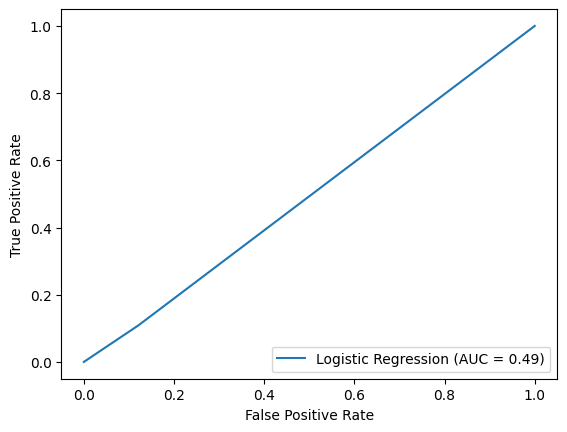

In [129]:
y_pred_proba = rfc.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Logistic Regression')
roc_display.plot()
plt.show()

# Logistic Regression with SMOTE

In [130]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000, random_state=0)
lr.fit(X_resampled_train_smote_std, y_resampled_train_smote)

y_pred = lr.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.09


In [131]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[    0 12243]
 [    0  1250]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12243
           1       0.09      1.00      0.17      1250

    accuracy                           0.09     13493
   macro avg       0.05      0.50      0.08     13493
weighted avg       0.01      0.09      0.02     13493



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC: 0.5299751368128727


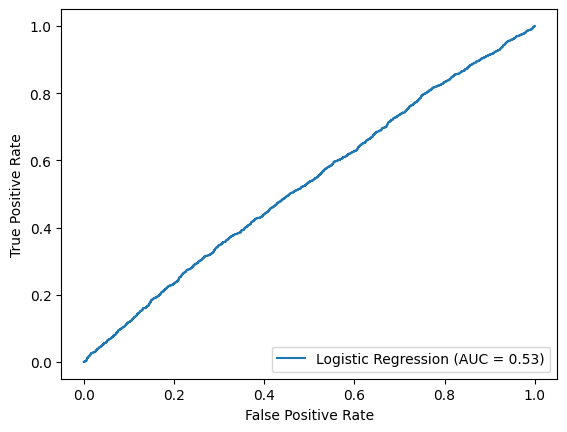

In [132]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# predict probabilities on test set
y_pred_proba = model.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Logistic Regression')
roc_display.plot()
plt.show()